In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#importing seaborn for statistical plots
import seaborn as sns
# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
from sklearn import metrics, svm
import statsmodels.formula.api as smf
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

from sklearn import preprocessing
from sklearn import utils

from scipy.stats import zscore,entropy
from sklearn.model_selection  import train_test_split, cross_val_score

In [2]:
df=pd.read_csv('parkinsons.data',sep=',')

In [3]:
#printing first 5 lines
df.head(5)
df=df.drop(['name'],axis=1)

In [4]:
#finding total number of rows and columns in the dataset
df.shape

(195, 23)

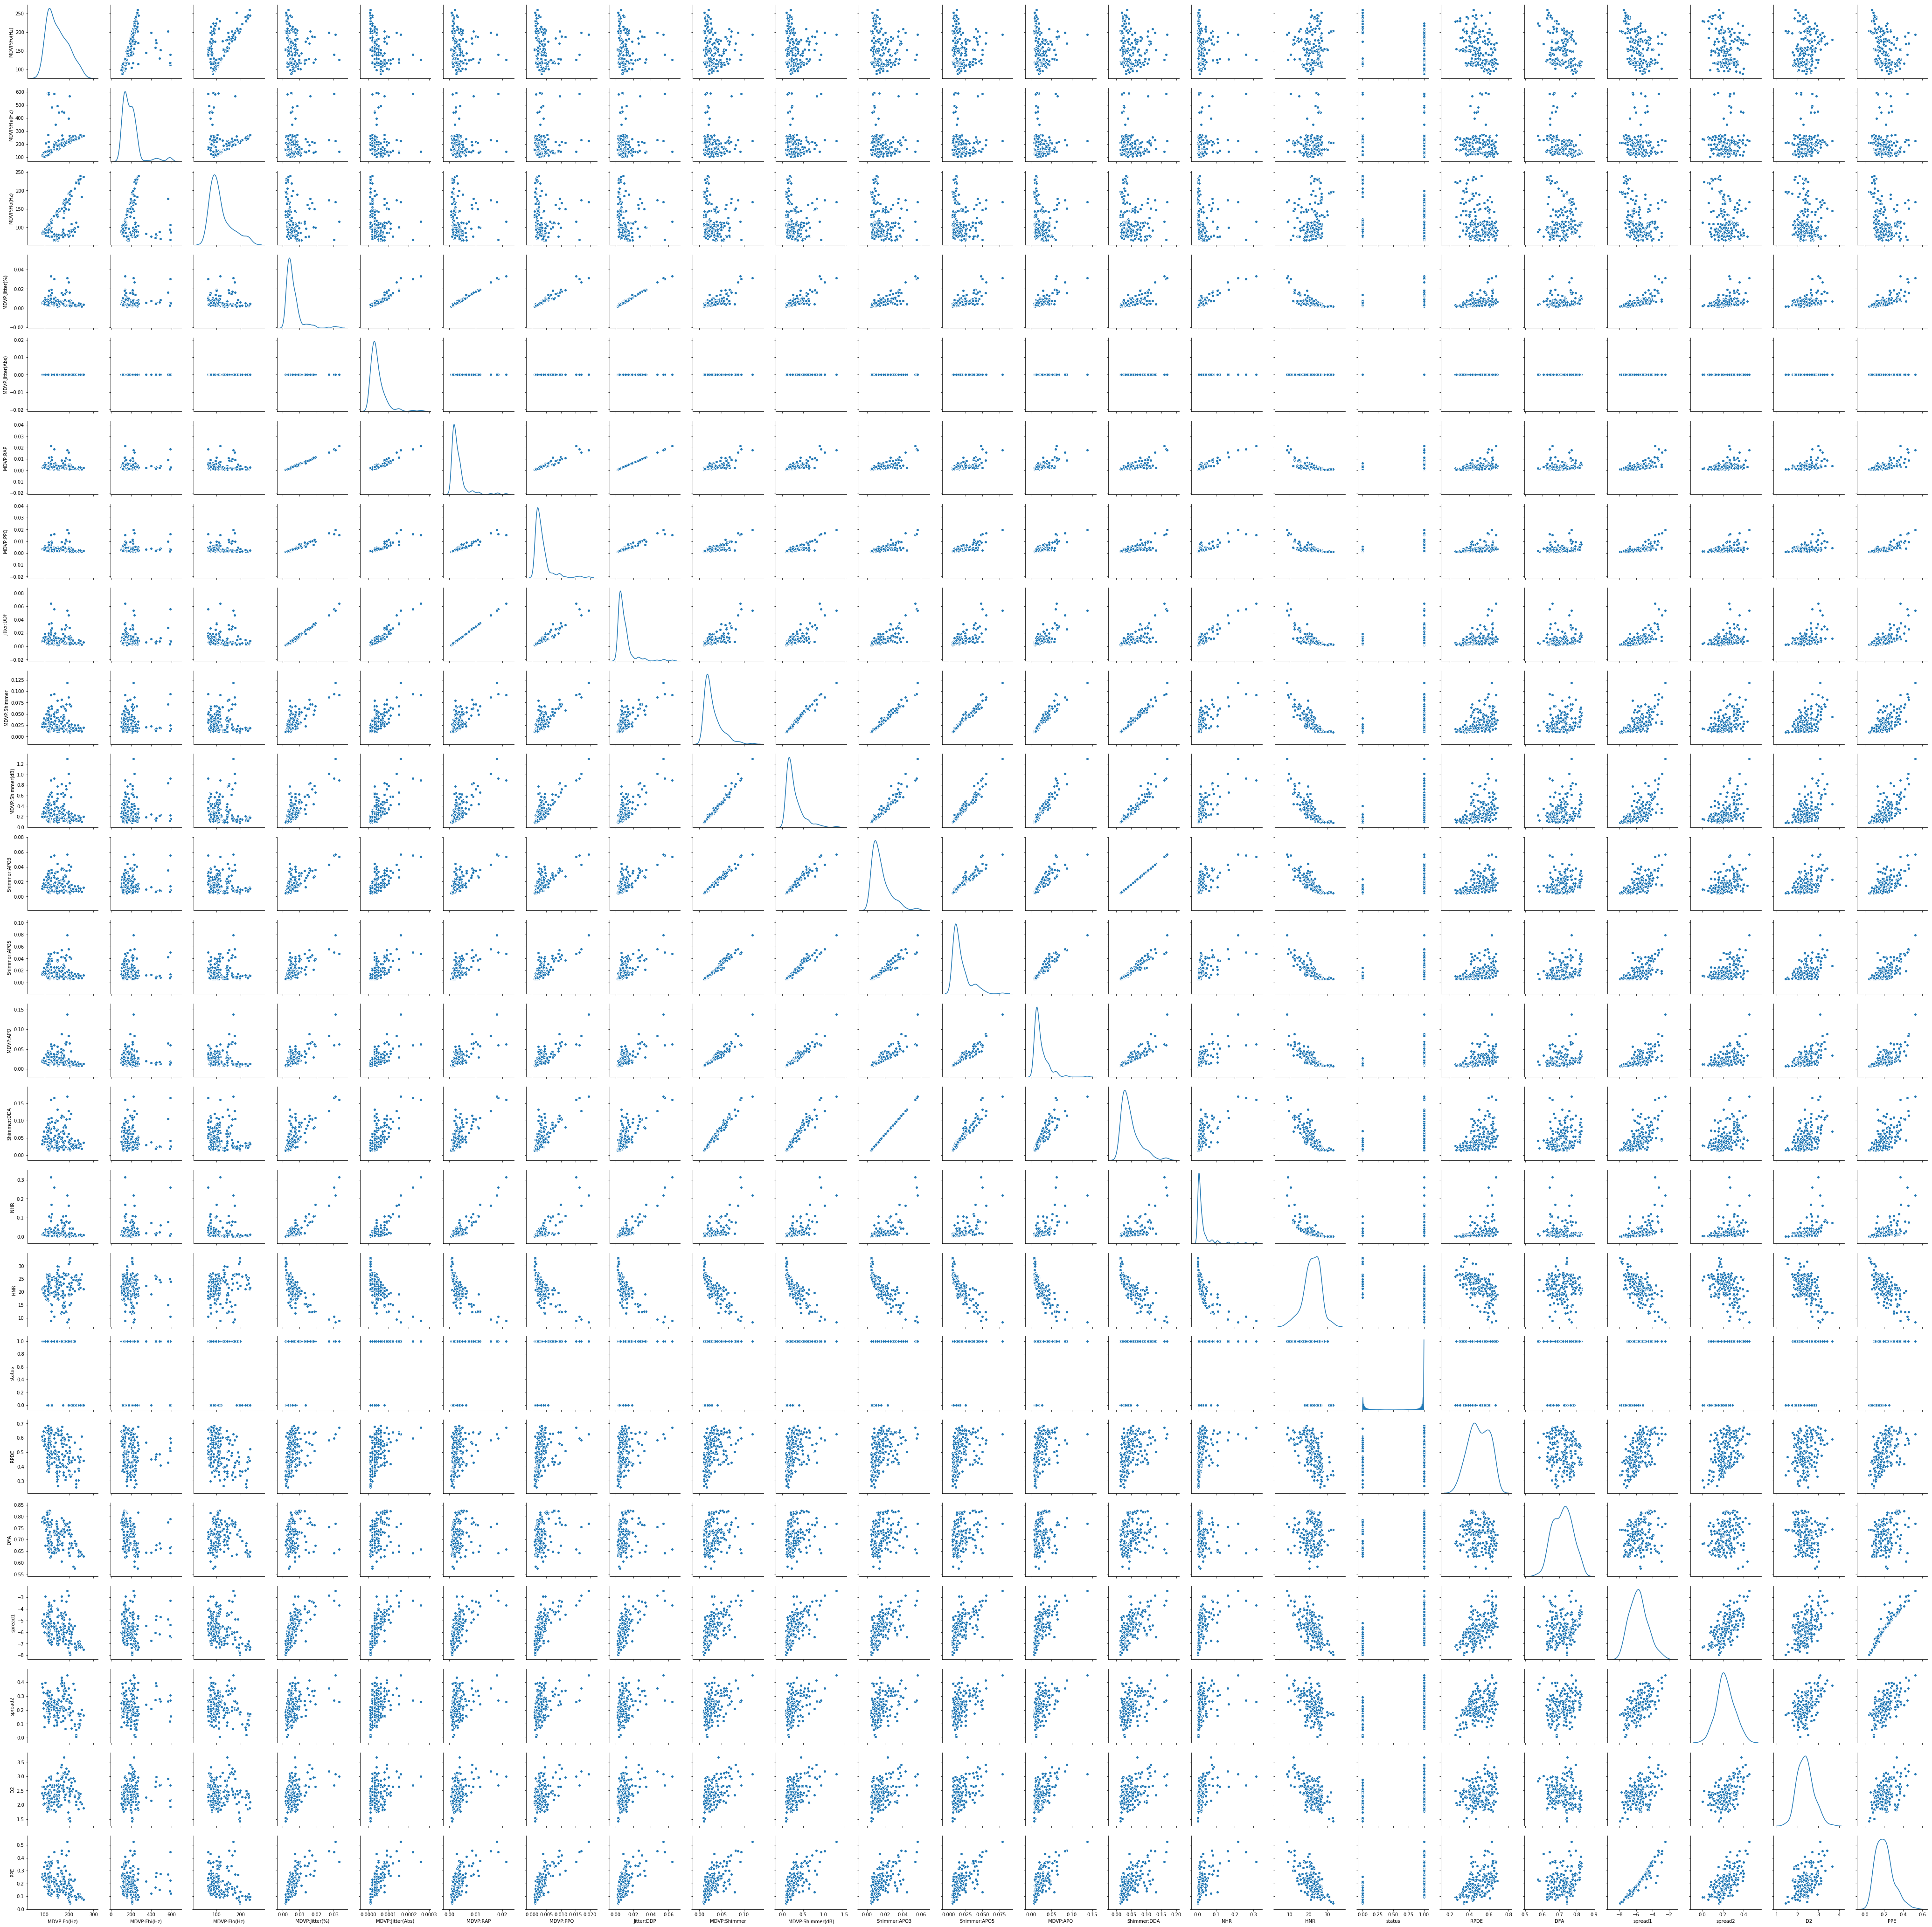

In [5]:
sns.pairplot(df,diag_kind='kde');

In [6]:
df.corr()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


In [7]:
df.columns=['Fo','Fhi','Flo','Jitterpercentage','Jitterabs', 'RAP', 'PPQ', 'DDP','Shimmer','Shimmerdb','ShimmerAPQ3','ShimmerAPQ5','APQ','DDA','NHR','HNR','status','RPDE','DFA','spread1','spread2','D2','PPE']

In [8]:
m1=smf.ols('status ~ Fo+Fhi+Flo+Jitterpercentage+Jitterabs+RAP+PPQ+DDP+Shimmer+Shimmerdb+ShimmerAPQ3+ShimmerAPQ5+APQ+DDA+NHR+HNR+status+RPDE+DFA+spread1+spread2+D2+PPE', df).fit()

In [9]:
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 status   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.507e+26
Date:                Sun, 03 Mar 2019   Prob (F-statistic):               0.00
Time:                        19:42:28   Log-Likelihood:                 5569.0
No. Observations:                 195   AIC:                        -1.109e+04
Df Residuals:                     171   BIC:                        -1.101e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -3.497e-15   3.66e-13     -0.010      0.992   -7.26e-13    7.19e-13
Fo                2.043e-16   4.76e-16      0.429      0.668   -7.35e-16    1.14e-15
Fhi               5.164e-17      1e-16      0.514      0.608   -1.47e-16     2.5e-16
Flo               2.142e-16   2.54e-16      0.845      0.399   -2.86e-16    7.15e-16
Jitterpercentage  6.395e-14   2.14e-11      0.003      0.998   -4.21e-11    4.23e-11
Jitterabs        -7.276e-12   1.45e-09     -0.005      0.996   -2.87e-09    2.85e-09
RAP               7.276e-12   2.92e-09      0.002      0.998   -5.75e-09    5.77e-09
PPQ              -3.055e-13   2.77e-11     -0.011      0.991   -5.49e-11    5.43e-11
DDP                       0   9.73e-10          0      1.000   -1.92e-09    1.92e-09
Shimmer          -3.553e-13   1.07e-11     -0.033      0.974   -2.16e-11    2.08e-11
Shimmerdb         3.997e-15   3.75e-13      0.011      0.992   -7.37e-13    7.45e-13
ShimmerAPQ3          -1e-11   2.81e-09     -0.004      0.997   -5.55e-09    5.53e-09
ShimmerAPQ5       7.461e-14   6.32e-12      0.012      0.991   -1.24e-11    1.26e-11
APQ               9.237e-14   3.41e-12      0.027      0.978   -6.63e-12    6.82e-12
DDA               4.547e-12   9.35e-10      0.005      0.996   -1.84e-09    1.85e-09
NHR              -3.497e-15   6.22e-13     -0.006      0.996   -1.23e-12    1.23e-12
HNR              -4.233e-15    4.5e-15     -0.940      0.348   -1.31e-14    4.65e-15
status               1.0000   2.38e-14   4.19e+13      0.000       1.000       1.000
RPDE              1.776e-15    1.4e-13      0.013      0.990   -2.74e-13    2.77e-13
DFA                2.22e-16   2.31e-13      0.001      0.999   -4.57e-13    4.57e-13
spread1          -3.927e-15   3.08e-14     -0.128      0.899   -6.47e-14    5.68e-14
spread2          -4.441e-16   1.53e-13     -0.003      0.998   -3.01e-13    3.01e-13
D2                4.718e-16   3.58e-14      0.013      0.989   -7.01e-14    7.11e-14
PPE               1.776e-15   4.34e-13      0.004      0.997   -8.54e-13    8.58e-13
==============================================================================
Omnibus:                       96.814   Durbin-Watson:                   0.321
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              392.045
Skew:                          -2.002   Prob(JB):                     7.39e-86
Kurtosis:                       8.676   Cond. No.                     1.25e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.25e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

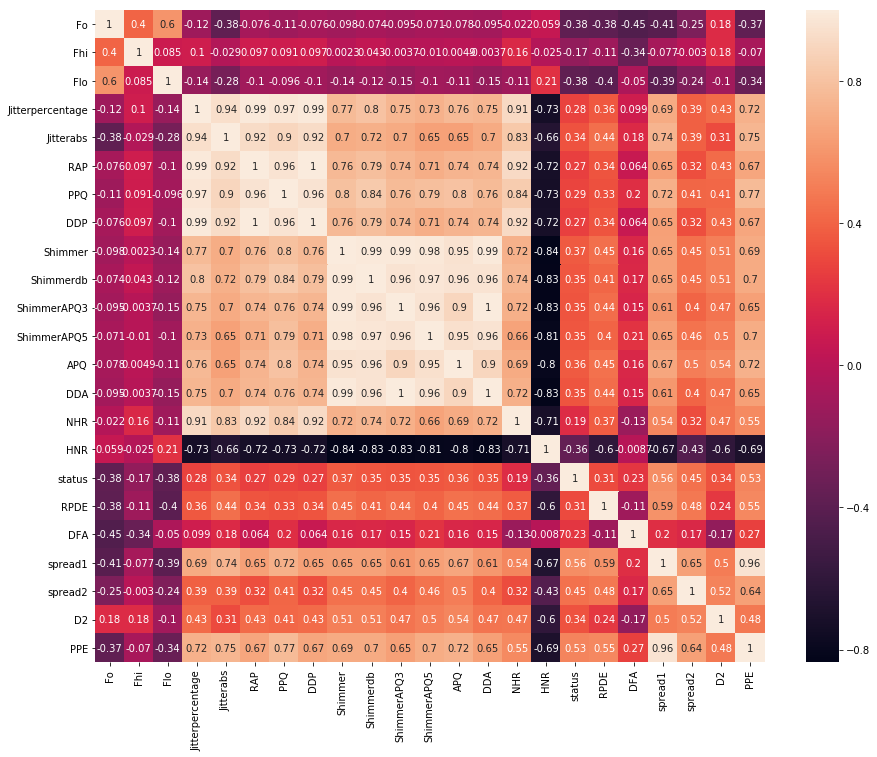

In [10]:
plt.figure(figsize=(15, 12))

df_corr = df.corr()
sns.heatmap(df_corr,
            xticklabels = df_corr.columns.values,
            yticklabels = df_corr.columns.values,
            annot = True);

C:\Users\sharan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


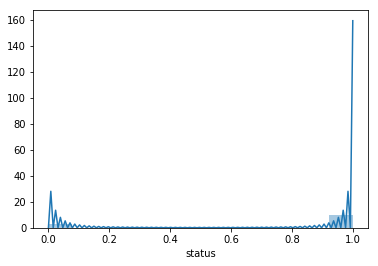

In [11]:
sns.distplot(df.status) # numeric

#sns.countplot(df.Category) # categorical
#sns.countplot(df.Number)

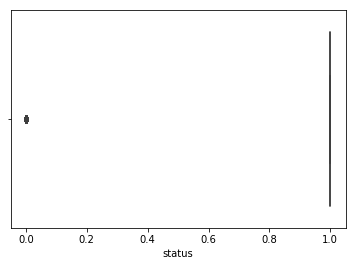

In [12]:
sns.boxplot(df.status) # numeric


C:\Users\sharan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


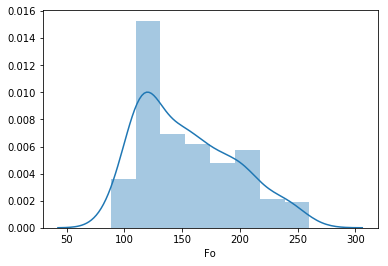

In [13]:
sns.distplot(df.Fo)

C:\Users\sharan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


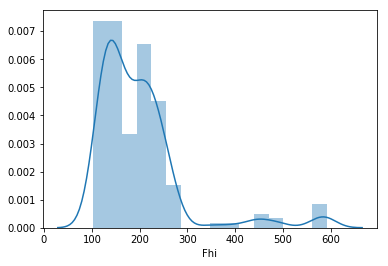

In [14]:
sns.distplot(df.Fhi)

C:\Users\sharan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


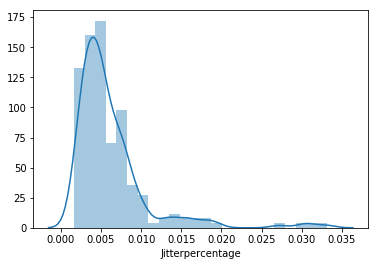

In [15]:
sns.distplot(df.Jitterpercentage)

In [16]:
## Most of the data are peaking on the left with a tail on the right.

In [17]:
#Check for any nan values

df.isnull().values.any()

False

In [18]:

df_z=zscore(df)

In [19]:
print(df_z)

[[-0.82929965 -0.43616456 -0.95203729 ...  0.48047686 -0.21053082
   0.86888575]
 [-0.77097169 -0.53097409 -0.05772056 ...  1.31118546  0.27507712
   1.80360503]
 [-0.90947638 -0.7231683  -0.10987483 ...  1.01768236 -0.10362861
   1.40266141]
 ...
 [ 0.49557839  0.47010361 -0.96839309 ... -0.81807931  0.78033848
  -0.83241014]
 [ 1.07876114  2.19004398 -0.95417967 ... -0.22906571 -0.63700298
  -0.92610456]
 [ 1.45481664  0.69224632 -0.88348115 ... -0.43085284  0.45480231
  -0.64505466]]


In [20]:
#Lets analysze the distribution of the various attributes
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Fo,195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
Fhi,195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
Flo,195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
Jitterpercentage,195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
Jitterabs,195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
Shimmerdb,195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


In [21]:
df.columns

Index(['Fo', 'Fhi', 'Flo', 'Jitterpercentage', 'Jitterabs', 'RAP', 'PPQ',
       'DDP', 'Shimmer', 'Shimmerdb', 'ShimmerAPQ3', 'ShimmerAPQ5', 'APQ',
       'DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA', 'spread1', 'spread2',
       'D2', 'PPE'],
      dtype='object')

In [22]:
df.head(5)

,Fo,Fhi,Flo,Jitterpercentage,Jitterabs,RAP,PPQ,DDP,Shimmer,Shimmerdb,...,DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [23]:
X=df.drop(['status'],axis=1)
Y=df['status']

In [24]:
#Spliting data into training and test data in 70:30
Xtrain,Xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.3,random_state=1)

In [25]:
clf_entropy = DecisionTreeClassifier( criterion = "entropy",random_state=1) 

In [26]:
clf_entropy.fit(Xtrain,ytrain)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [27]:
yPred=clf_entropy.predict(Xtest)
rmse=np.sqrt(np.mean((ytest-yPred)**2))
rmse

0.3682298471593293

In [28]:
clf_entropy.score(Xtest,ytest)

0.864406779661017

In [29]:
from sklearn.metrics import confusion_matrix
print("The accuracy after using Entopy :",accuracy_score(ytest,yPred))
print("The confusion matrix for the model is \n:",confusion_matrix(yPred,ytest))

The accuracy after using Entopy : 0.864406779661017
The confusion matrix for the model is 
: [[12  1]
 [ 7 39]]


In [30]:
#checking for model accuracy using vaious max_depth and min_samples_leaf values
#Model 1
model1 = DecisionTreeClassifier( criterion = "entropy",max_depth=3,min_samples_leaf=10,random_state=1) 
model1.fit(Xtrain,ytrain)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [31]:
yPred1=model1.predict(Xtest)
rmse1=np.sqrt(np.mean((ytest-yPred1)**2))
rmse1

0.39056673294247163

In [32]:
model1.score(Xtest,ytest)

0.847457627118644

In [33]:
print("The confusion matrix for the model is \n:",confusion_matrix(yPred1,ytest))

The confusion matrix for the model is 
: [[11  1]
 [ 8 39]]


In [34]:
#Model 2
model2 = DecisionTreeClassifier( criterion = "entropy",max_depth=6,min_samples_leaf=100,random_state=1) 
model2.fit(Xtrain,ytrain)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [35]:
yPred2=model2.predict(Xtest)
rmse2=np.sqrt(np.mean((ytest-yPred2)**2))
rmse2

0.5674803065350239

In [36]:
model2.score(Xtest,ytest)

0.6779661016949152

In [37]:
print("The confusion matrix for the model is \n:",confusion_matrix(yPred2,ytest))

The confusion matrix for the model is 
: [[ 0  0]
 [19 40]]


In [38]:
#Model 3
model3 = DecisionTreeClassifier( criterion = "entropy",max_depth=9,min_samples_leaf=50,random_state=1) 
model3.fit(Xtrain,ytrain)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [39]:
yPred3=model3.predict(Xtest)
rmse3=np.sqrt(np.mean((ytest-yPred3)**2))
rmse3

0.5674803065350239

In [40]:
model3.score(Xtest,ytest)

0.6779661016949152

In [41]:
print("The confusion matrix for the model is \n:",confusion_matrix(yPred3,ytest))

The confusion matrix for the model is 
: [[ 0  0]
 [19 40]]


In [42]:
#Model 4
model4 = DecisionTreeClassifier( criterion = "entropy",max_depth=3,min_samples_leaf=5,random_state=1) 
model4.fit(Xtrain,ytrain)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [43]:
yPred4=model4.predict(Xtest)
rmse4=np.sqrt(np.mean((ytest-yPred4)**2))
rmse4

0.31889640207164033

In [44]:
model4.score(Xtest,ytest)

0.8983050847457628

In [45]:
print("The confusion matrix for the model is \n:",confusion_matrix(yPred4,ytest))

The confusion matrix for the model is 
: [[14  1]
 [ 5 39]]


From models 2 &3 we can infer that as we increase the max_depth and min_samples_leaf the predictions are 
catagorised as only false. We cant use such a model in real world application. So higher depth and samples value are 
not needed in this model. But from model 4 we can see that the accuracy can be imrpoved by changing min_samples_leaf values 
keeping the max_depth values constant

In [46]:
from sklearn.ensemble import RandomForestClassifier
r=RandomForestClassifier(n_estimators=30,random_state=1)
r.fit(Xtrain,ytrain)
s=r.predict(Xtest)
print("The accuracy after using Random forest Classifier is:",accuracy_score(s,ytest))
print("The confusion matrix for the model is \n:",confusion_matrix(s,ytest))

The accuracy after using Random forest Classifier is: 0.847457627118644
The confusion matrix for the model is 
: [[11  1]
 [ 8 39]]


In [47]:
r1=RandomForestClassifier(n_estimators=25,random_state=1)
r1.fit(Xtrain,ytrain)
s1=r1.predict(Xtest)
print("The accuracy after using Random forest Classifier is:",accuracy_score(s1,ytest))
print("The confusion matrix for the model is \n:",confusion_matrix(s1,ytest))

The accuracy after using Random forest Classifier is: 0.847457627118644
The confusion matrix for the model is 
: [[11  1]
 [ 8 39]]


In [48]:
r2=RandomForestClassifier(n_estimators=60,random_state=1)
r2.fit(Xtrain,ytrain)
s2=r2.predict(Xtest)
print("The accuracy after using Random forest Classifier is:",accuracy_score(s2,ytest))
print("The confusion matrix for the model is \n:",confusion_matrix(s2,ytest))

The accuracy after using Random forest Classifier is: 0.8813559322033898
The confusion matrix for the model is 
: [[13  1]
 [ 6 39]]


In [49]:
r3=RandomForestClassifier(n_estimators=5,random_state=1)
r3.fit(Xtrain,ytrain)
s3=r3.predict(Xtest)
print("The accuracy after using Random forest Classifier is:",accuracy_score(s3,ytest))
print("The confusion matrix for the model is \n:",confusion_matrix(s3,ytest))

The accuracy after using Random forest Classifier is: 0.8135593220338984
The confusion matrix for the model is 
: [[13  5]
 [ 6 35]]


In [53]:
r4=RandomForestClassifier(n_estimators=15,random_state=1)
r4.fit(Xtrain,ytrain)
s4=r4.predict(Xtest)
print("The accuracy after using Random forest Classifier is:",accuracy_score(s4,ytest))
print("The confusion matrix for the model is \n:",confusion_matrix(s4,ytest))

The accuracy after using Random forest Classifier is: 0.8813559322033898
The confusion matrix for the model is 
: [[12  0]
 [ 7 40]]


In [51]:
r5=RandomForestClassifier(n_estimators=61,random_state=1)
r5.fit(Xtrain,ytrain)
s5=r5.predict(Xtest)
print("The accuracy after using Random forest Classifier is:",accuracy_score(s5,ytest))
print("The confusion matrix for the model is \n:",confusion_matrix(s5,ytest))

The accuracy after using Random forest Classifier is: 0.864406779661017
The confusion matrix for the model is 
: [[12  1]
 [ 7 39]]


In [52]:
r6=RandomForestClassifier(n_estimators=59,random_state=1)
r6.fit(Xtrain,ytrain)
s6=r6.predict(Xtest)
print("The accuracy after using Random forest Classifier is:",accuracy_score(s6,ytest))
print("The confusion matrix for the model is \n:",confusion_matrix(s6,ytest))

The accuracy after using Random forest Classifier is: 0.864406779661017
The confusion matrix for the model is 
: [[12  1]
 [ 7 39]]


The model accuracy maximises around n_estimators=60 and 15 to 0.8813 for model r2 and r4, and as can be seen from model r5 and r6 are having 0.8644 as accuracy scores.
it will be based on the end user preference.